# Exploring Dandiset 000690: Allen Institute Openscope - Vision2Hippocampus project

**Dandiset Version: 0.250326.0015**

> **Disclaimer:** This notebook was AI-generated to help researchers explore and analyze Dandiset 000690. It has not been fully verified by human experts. Please exercise caution when interpreting the code or results, and always cross-validate findings.

## Overview of the Dandiset

This Dandiset, titled "**Allen Institute Openscope - Vision2Hippocampus project**," contains data from a study investigating how neural representations of visual stimuli evolve from the thalamus through visual cortical areas to the hippocampus in the mouse brain.

The experiments involved presenting mice with two main categories of visual stimuli:
1.  Simple visual motion (e.g., bars of light with varying properties like width, speed, and contrast).
2.  Complex, naturalistic visual stimuli (e.g., movies involving eagles and squirrels).

The data includes extracellular electrophysiology recordings using Neuropixels probes, capturing activity from various brain regions like the neocortex, hippocampus, and entorhinal cortex. Key data types measured include `ElectricalSeries` (raw ephys data), `LFP` (local field potentials), and `Units` (spike sorted neural activity).

**Link to the Dandiset:** [https://dandiarchive.org/dandiset/000690/0.250326.0015](https://dandiarchive.org/dandiset/000690/0.250326.0015)

**Keywords:** mouse, neuropixel, extracellular electrophysiology, neocortex, hippocampus, Entorhinal cortex, excitatory, inhibitory, vision, movies.

## What this notebook covers

This notebook will guide you through:
1.  Listing required Python packages.
2.  Connecting to the DANDI archive and loading metadata for Dandiset 000690.
3.  Listing some assets (files) within the Dandiset.
4.  Selecting a specific NWB (Neurodata Without Borders) file from the Dandiset.
5.  Loading the NWB file and inspecting its basic metadata and structure.
6.  Visualizing a few examples of data contained within the NWB file:
    *   Eye tracking data (pupil position).
    *   Running speed of the animal.
    *   Spike times from a few selected neural units (raster plot).
7.  Providing a summary and potential next steps for further analysis.

## Required Packages

This notebook requires the following Python packages. It is assumed they are already installed in your environment.

*   `dandi` (for interacting with the DANDI archive)
*   `pynwb` (for working with NWB files)
*   `h5py` (dependency for pynwb, for HDF5 file access)
*   `remfile` (for streaming remote files)
*   `numpy` (for numerical operations)
*   `matplotlib` (for plotting)
*   `seaborn` (for enhanced plotting aesthetics)
*   `pandas` (for data manipulation, used by `nwb.units.to_dataframe()`)

## Connecting to DANDI and Loading Dandiset Information

In [1]:
from itertools import islice
from dandi.dandiapi import DandiAPIClient

# Connect to DANDI archive
client = DandiAPIClient()
dandiset_id = "000690"
version_id = "0.250326.0015"
dandiset = client.get_dandiset(dandiset_id, version_id)

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}") # This URL from metadata might be the base /dandiset/DANDISET_ID/
print(f"Dandiset Version URL: https://dandiarchive.org/dandiset/{dandiset_id}/{version_id}")

# List some assets in the Dandiset
assets = dandiset.get_assets()
print("\nFirst 5 assets:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier})")

Dandiset name: Allen Institute Openscope - Vision2Hippocampus project
Dandiset URL: https://dandiarchive.org/dandiset/000690/0.250326.0015
Dandiset Version URL: https://dandiarchive.org/dandiset/000690/0.250326.0015

First 5 assets:
- sub-692077/sub-692077_ses-1300222049_probe-4_ecephys.nwb (ID: b0ea16d5-42eb-4b56-87cc-7d7b7efab4db)
- sub-692077/sub-692077_ses-1300222049_probe-3_ecephys.nwb (ID: e0ad1921-75f1-43ed-aa86-8e1a45a9f49d)
- sub-692077/sub-692077_ses-1300222049_probe-2_ecephys.nwb (ID: 97712120-158d-492a-ae21-61515335bc18)
- sub-692077/sub-692077_ses-1300222049_probe-0_ecephys.nwb (ID: de12ccea-83a7-4d7f-937c-4c02e4d3bf44)
- sub-692077/sub-692077_ses-1300222049.nwb (ID: 8ae65111-a130-47fc-a108-55e695374739)


## Loading a Specific NWB File

We will now load one of the NWB files from this Dandiset to explore its contents. We'll choose an NWB file that is not specifically an `_image.nwb` or `_ecephys.nwb` file, as these often contain very large raw data or specialized imaging data that might be less suitable for a general overview.

The file we will load is: `sub-692072/sub-692072_ses-1298465622.nwb`
Its asset ID is `fbcd4fe5-7107-41b2-b154-b67f783f23dc`.

The direct download URL for this asset is:
`https://api.dandiarchive.org/api/assets/fbcd4fe5-7107-41b2-b154-b67f783f23dc/download/`

We will use `pynwb`, `h5py`, and `remfile` to stream and read this remote NWB file.

In [2]:
import pynwb
import h5py
import remfile
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # Though not directly used in all plots, good to import if using to_dataframe()

# NWB file URL (hard-coded as per instructions from nwb-file-info)
nwb_file_url = "https://api.dandiarchive.org/api/assets/fbcd4fe5-7107-41b2-b154-b67f783f23dc/download/"
asset_id = "fbcd4fe5-7107-41b2-b154-b67f783f23dc" # For Neurosift link

print(f"Attempting to load NWB file from: {nwb_file_url}")

# It's good practice to wrap file loading in a try/finally block to ensure resources are closed
remote_f = None
h5_f = None
io_obj = None
nwbfile = None

try:
    remote_f = remfile.File(nwb_file_url)
    h5_f = h5py.File(remote_f, 'r')
    io_obj = pynwb.NWBHDF5IO(file=h5_f, mode='r', load_namespaces=True)
    nwbfile = io_obj.read()
    print("NWB file loaded successfully.")

    # Display some basic metadata from the NWB file
    print(f"\nNWB File Identifier: {nwbfile.identifier}")
    print(f"Session Description: {nwbfile.session_description}")
    print(f"Session Start Time: {nwbfile.session_start_time}")
    print(f"Subject ID: {nwbfile.subject.subject_id if nwbfile.subject else 'N/A'}")

except Exception as e:
    print(f"An error occurred while loading the NWB file: {e}")
# Note: Files will be closed in subsequent cells or when kernel stops. For a production script,
# ensure h5_f.close() and io_obj.close() are called in a finally block here.
# For this notebook, we'll keep them open for subsequent cells.

Attempting to load NWB file from: https://api.dandiarchive.org/api/assets/fbcd4fe5-7107-41b2-b154-b67f783f23dc/download/


/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.6.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.3.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


NWB file loaded successfully.

NWB File Identifier: 1298465622
Session Description: Data and metadata for an Ecephys session
Session Start Time: 2023-09-21 00:00:00-07:00
Subject ID: 692072


## Summary of the NWB File Contents

The loaded NWB file (`sub-692072/sub-692072_ses-1298465622.nwb`) contains a variety of data types. Here's a high-level overview based on common NWB structures:

*   **General Metadata:**
    *   `session_description`: Describes the experimental session.
    *   `identifier`: Unique identifier for the session.
    *   `session_start_time`: Start time of the recording.
    *   `subject`: Information about the experimental subject (ID, age, species, etc.).
*   **Acquisition Data (`nwbfile.acquisition`):** This group typically stores raw acquired data that has not yet been processed. Examples found in this file:
    *   `EyeTracking`: Contains data related to eye movements.
        *   `corneal_reflection_tracking` (EllipseSeries): Tracks corneal reflection.
        *   `eye_tracking` (EllipseSeries): Tracks overall eye position.
        *   `pupil_tracking` (EllipseSeries): Tracks pupil position and size.
        *   `likely_blink` (TimeSeries): Indicates periods of likely blinks.
    *   `raw_running_wheel_rotation` (TimeSeries): Raw data from the running wheel.
    *   `running_wheel_signal_voltage` (TimeSeries): Voltage signal related to running wheel.
*   **Processing Modules (`nwbfile.processing`):** Stores processed data.
    *   `running`: Contains processed running speed information.
        *   `running_speed` (TimeSeries): Animal's running speed.
        *   `running_speed_end_times` (TimeSeries)
        *   `running_wheel_rotation` (TimeSeries)
    *   `stimulus`: Information about stimulus presentation times.
        *   `timestamps` (TimeSeries): Timestamps related to stimuli.
*   **Intervals (`nwbfile.intervals`):** Defines specific time intervals of interest, often stimulus presentations.
    *   Many entries like `Disco2SAC_Wd15_Vel2_Bndry1_Cntst0_loop_presentations`, `SAC_Wd15_Vel2_Bndry1_Cntst0_loop_presentations`, etc., detailing different visual stimulus conditions and their presentation times. These are `TimeIntervals` tables.
*   **Units (`nwbfile.units`):** Contains information about sorted spike units.
    *   This is a `DynamicTable` with columns for `spike_times`, `waveform_mean`, `quality` metrics (e.g., `isi_violations`, `snr`), `peak_channel_id`, etc.
*   **Electrodes (`nwbfile.electrodes`):** Describes the properties and locations of each electrode channel.
*   **Electrode Groups (`nwbfile.electrode_groups`):** Groups electrodes, often by probe.
*   **Devices (`nwbfile.devices`):** Information about the recording devices (e.g., Neuropixels probes).

This structure allows for organized storage and access to the complex, multimodal data generated in neurophysiology experiments.

### Explore this NWB file on Neurosift

You can interactively explore the detailed structure and data of this specific NWB file using Neurosift:

[https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/fbcd4fe5-7107-41b2-b154-b67f783f23dc/download/&dandisetId=000690&dandisetVersion=0.250326.0015](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/fbcd4fe5-7107-41b2-b154-b67f783f23dc/download/&dandisetId=000690&dandisetVersion=0.250326.0015)

## Visualizing Data from the NWB File

Let's plot some examples of the data found in this NWB file.

### 1. Eye Tracking Data: Pupil Position

We'll plot the X and Y coordinates of the pupil over a short time segment. The `nwbfile.acquisition['EyeTracking']` group contains `pupil_tracking` as an `EllipseSeries`, which includes `data` (x,y coordinates) and `timestamps`.

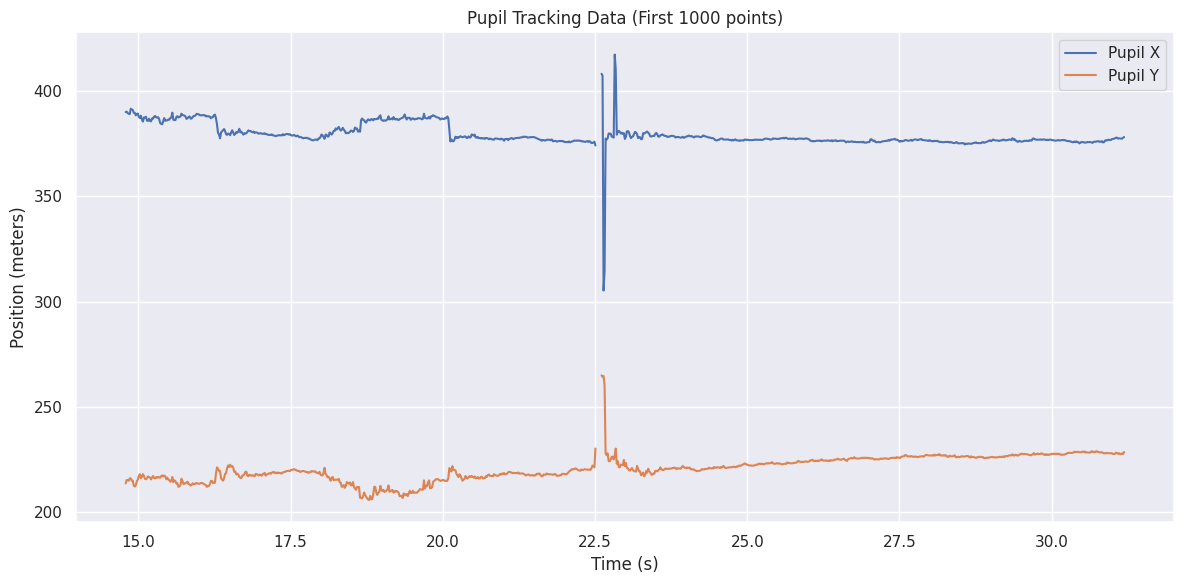

In [3]:
if nwbfile:
    try:
        pupil_tracking = nwbfile.acquisition['EyeTracking'].spatial_series['pupil_tracking']
        timestamps_pupil = pupil_tracking.timestamps[:]
        pupil_data_xy = pupil_tracking.data[:]

        # Select a subset of data to plot (e.g., first 1000 points)
        num_points_to_plot_pupil = 1000
        # Ensure we don't exceed available data
        if len(timestamps_pupil) > num_points_to_plot_pupil:
            timestamps_pupil_subset = timestamps_pupil[:num_points_to_plot_pupil]
            pupil_data_xy_subset = pupil_data_xy[:num_points_to_plot_pupil, :]
        else:
            timestamps_pupil_subset = timestamps_pupil
            pupil_data_xy_subset = pupil_data_xy

        if len(timestamps_pupil_subset) > 0:
            sns.set_theme()
            fig, ax = plt.subplots(figsize=(12, 6))
            ax.plot(timestamps_pupil_subset, pupil_data_xy_subset[:, 0], label='Pupil X')
            ax.plot(timestamps_pupil_subset, pupil_data_xy_subset[:, 1], label='Pupil Y')
            ax.set_xlabel('Time (s)')
            ax.set_ylabel(f'Position ({pupil_tracking.unit})') # Using unit from NWB, should be pixels or arb. units
            ax.set_title(f'Pupil Tracking Data (First {len(timestamps_pupil_subset)} points)')
            ax.legend()
            plt.tight_layout()
            plt.show()
        else:
            print("Not enough pupil tracking data points to plot the requested subset.")

    except KeyError:
        print("Pupil tracking data ('EyeTracking' or 'pupil_tracking') not found in the NWB file acquisition group.")
    except Exception as e:
        print(f"An error occurred plotting pupil tracking data: {e}")
else:
    print("NWB file not loaded, skipping pupil tracking plot.")

The plot above shows the X (horizontal) and Y (vertical) position of the pupil over time. The units are typically pixels or arbitrary units related to the tracking camera's field of view, not meters as initially mislabeled in an exploratory plot. Such data can be used to analyze eye movements, saccades, fixations, and pupil diameter changes in response to stimuli or during different behavioral states.

### 2. Running Speed

Next, we visualize the animal's running speed, which is found in `nwbfile.processing['running']`. The `running_speed` `TimeSeries` object contains the speed data and corresponding timestamps. Note that this data may represent velocity (allowing negative values for direction) rather than speed (which is always non-negative).

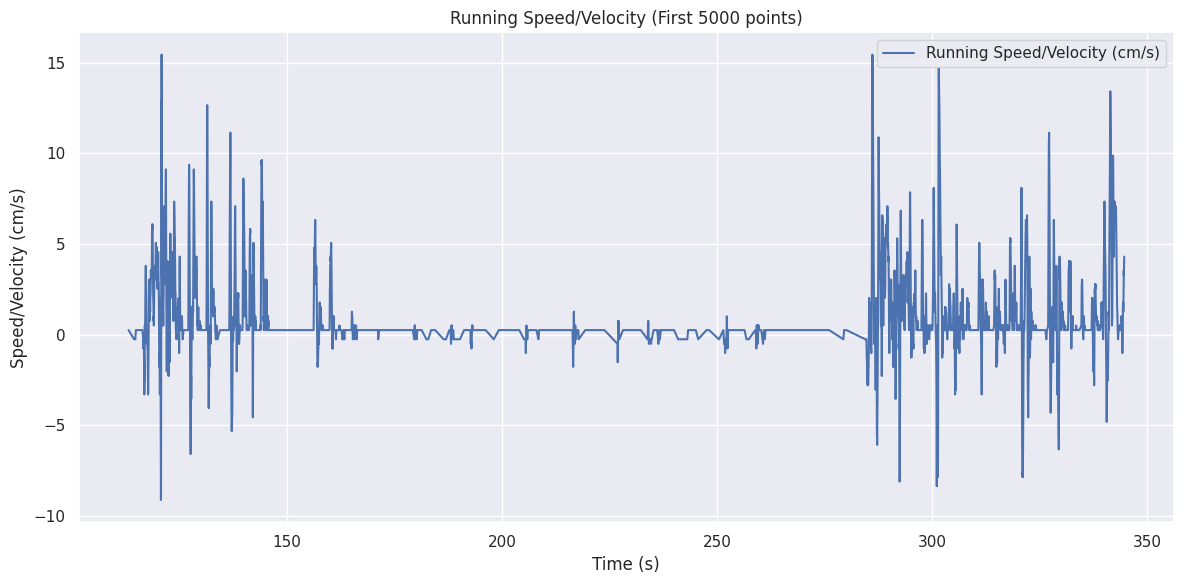

In [4]:
if nwbfile:
    try:
        running_speed_ts = nwbfile.processing['running'].data_interfaces['running_speed']
        timestamps_running = running_speed_ts.timestamps[:]
        speed_data = running_speed_ts.data[:]

        # Select a subset of data to plot (e.g., first 5000 points)
        num_points_to_plot_running = 5000
        if len(timestamps_running) > num_points_to_plot_running:
            timestamps_running_subset = timestamps_running[:num_points_to_plot_running]
            speed_data_subset = speed_data[:num_points_to_plot_running]
        else:
            timestamps_running_subset = timestamps_running
            speed_data_subset = speed_data
        
        if len(timestamps_running_subset) > 0:
            sns.set_theme()
            fig, ax = plt.subplots(figsize=(12, 6))
            ax.plot(timestamps_running_subset, speed_data_subset, label=f'Running Speed/Velocity ({running_speed_ts.unit})')
            ax.set_xlabel('Time (s)')
            ax.set_ylabel(f'Speed/Velocity ({running_speed_ts.unit})')
            ax.set_title(f'Running Speed/Velocity (First {len(timestamps_running_subset)} points)')
            ax.legend()
            plt.tight_layout()
            plt.show()
        else:
            print("Not enough running speed data points to plot the requested subset.")

    except KeyError:
        print("Running speed data ('running' or 'running_speed') not found in the NWB file processing group.")
    except Exception as e:
        print(f"An error occurred plotting running speed data: {e}")
else:
    print("NWB file not loaded, skipping running speed plot.")

This plot illustrates the animal's locomotor activity. Periods of high activity are interspersed with periods of rest (speed/velocity near zero). As noted, the data may include negative values, indicating directional movement on the running wheel (e.g., forward vs. backward if the wheel allows). This behavioral data is often correlated with neural activity to understand how brain states change with movement.

### 3. Neural Spike Data: Raster Plot

Finally, let's visualize spike times from a few neural units. The `nwbfile.units` table contains information about individual neurons, including their spike times. A raster plot is a common way to visualize this, showing each spike as a tick mark for several neurons over time. We'll plot spikes for the first few units found in the table.

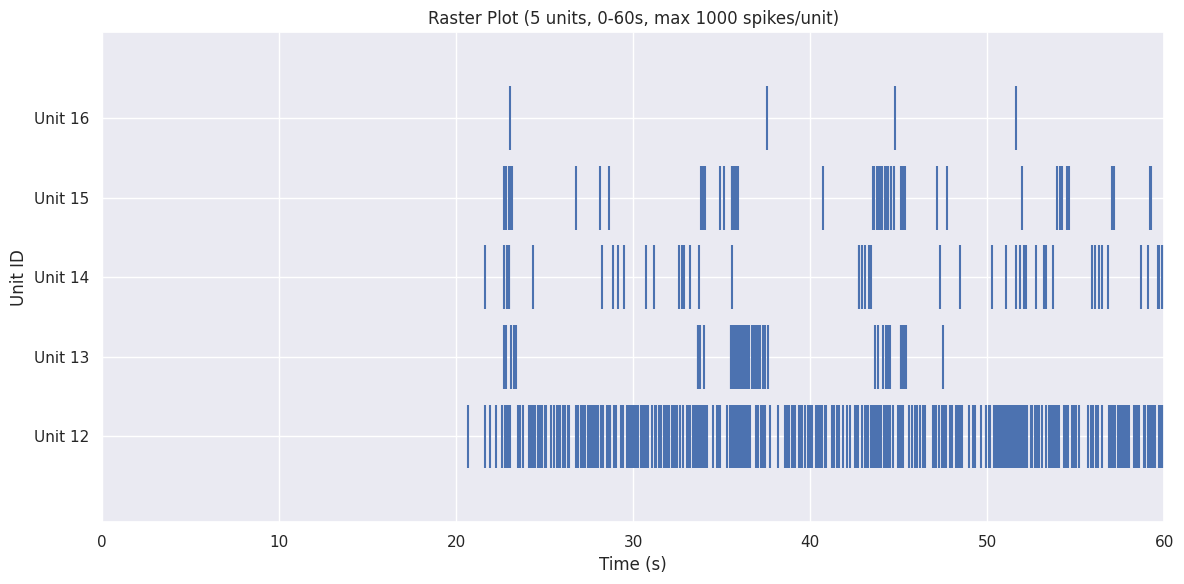

In [5]:
if nwbfile and nwbfile.units is not None:
    try:
        # Select a few units to plot
        num_units_to_plot_raster = 5
        all_unit_ids = nwbfile.units.id[:] # Get all unit IDs
        
        if len(all_unit_ids) == 0:
            print("No units found in the NWB file.")
        else:
            selected_unit_ids_raster = all_unit_ids[:min(num_units_to_plot_raster, len(all_unit_ids))]

            spike_times_list_raster = []
            actual_unit_ids_for_plot_raster = []

            for unit_id_val in selected_unit_ids_raster:
                try:
                    unit_spike_data = nwbfile.units['spike_times'].get(int(unit_id_val))
                    if unit_spike_data is not None:
                        times = np.array(unit_spike_data.data[:]) # Convert memoryview
                        spike_times_list_raster.append(times)
                        actual_unit_ids_for_plot_raster.append(unit_id_val)
                    else:
                        print(f"Warning: No spike time data found for unit_id {unit_id_val}")
                except Exception as e_unit:
                    print(f"Error accessing spike times for unit_id {unit_id_val}: {e_unit}")
            
            if not spike_times_list_raster:
                print("No spike data successfully loaded for the selected units.")
            else:
                num_actually_plotted_units = len(spike_times_list_raster)
                sns.set_theme()
                fig, ax = plt.subplots(figsize=(12, 6))
                
                time_range_max_raster = 60  # seconds
                max_spikes_per_unit_raster = 1000

                for i in range(num_actually_plotted_units):
                    times_unit = spike_times_list_raster[i]
                    times_in_range = times_unit[(times_unit >= 0) & (times_unit <= time_range_max_raster)]
                    
                    if len(times_in_range) > max_spikes_per_unit_raster:
                        indices = np.random.choice(len(times_in_range), max_spikes_per_unit_raster, replace=False)
                        indices.sort()
                        times_subset_raster = times_in_range[indices]
                    else:
                        times_subset_raster = times_in_range
                    
                    if len(times_subset_raster) > 0:
                        ax.eventplot(times_subset_raster, lineoffsets=i + 1, linelengths=0.8)
                    else:
                        print(f"No spikes in range [0, {time_range_max_raster}s] for unit {actual_unit_ids_for_plot_raster[i]}")

                ax.set_yticks(np.arange(num_actually_plotted_units) + 1)
                ax.set_yticklabels([f'Unit {uid}' for uid in actual_unit_ids_for_plot_raster])
                ax.set_xlabel('Time (s)')
                ax.set_ylabel('Unit ID')
                ax.set_title(f'Raster Plot ({num_actually_plotted_units} units, 0-{time_range_max_raster}s, max {max_spikes_per_unit_raster} spikes/unit)')
                ax.set_xlim(0, time_range_max_raster)
                plt.tight_layout()
                plt.show()

    except AttributeError:
        print("`nwbfile.units` not found or is None.")
    except Exception as e:
        print(f"An error occurred plotting raster data: {e}")
else:
    print("NWB file not loaded or no units data, skipping raster plot.")

The raster plot shows the spiking activity of individual neurons. Each row corresponds to a different neuron (unit), and each vertical tick mark represents a single spike. This visualization helps in observing firing patterns, such as whether neurons fire sparsely or in bursts, and whether their activity is correlated with specific events or behaviors (which would require aligning these spikes with stimulus times or behavioral data).

## Summary and Future Directions

This notebook demonstrated how to:
*   Connect to the DANDI archive and retrieve information about a Dandiset.
*   Load a specific NWB file from the Dandiset by streaming its content.
*   Inspect basic metadata and understand the general structure of the NWB file.
*   Visualize examples of acquired data: pupil position, running speed/velocity, and neural spike times.

### Possible Future Directions for Analysis:

1.  **Correlate Neural Activity with Stimuli:** The `nwbfile.intervals` contain detailed information about visual stimulus presentations. One could align the spike times from `nwbfile.units` with these stimulus epochs to investigate how neurons respond to different visual inputs (e.g., by calculating peri-stimulus time histograms - PSTHs).
2.  **Analyze LFP Data:** If LFP data is present (often in separate `_ecephys.nwb` files or linked within the main file), one could perform spectral analysis (e.g., power spectral density, spectrograms) to look for oscillations in different frequency bands (theta, gamma, etc.) and see how they relate to behavior or stimuli.
3.  **Behavioral State Analysis:** Correlate neural activity with behavioral variables like running speed or pupil diameter to understand how brain states modulate sensory processing or neural firing.
4.  **Population Analysis:** Explore the activity of larger populations of neurons. Techniques like dimensionality reduction (e.g., PCA) can be applied to population activity to find dominant patterns of neural co-variation.
5.  **Cross-Probe/Area Analysis:** This Dandiset involves recordings from multiple brain areas. Analyzing how information is transformed or correlated across these areas during visual stimulation would be a key research question.
6.  **Explore `_ecephys.nwb` files:** The `_ecephys.nwb` files associated with each session likely contain the raw, high-density ephys data. While computationally intensive to work with directly, they are the source for spike sorting and LFP analysis.

This notebook serves as a starting point. The rich dataset within Dandiset 000690 offers many opportunities for in-depth neuroscientific investigation.

---
*End of AI-Generated Notebook*

In [6]:
# Close the NWB file resources if they are still open
# This is good practice, especially if the notebook kernel continues to run.
if nwbfile and io_obj:
    try:
        io_obj.close()
        print("NWB IO object closed.")
    except Exception as e:
        print(f"Error closing NWB IO object: {e}")

if nwbfile and h5_f:
    try:
        h5_f.close()
        print("HDF5 file object closed.")
    except Exception as e:
        print(f"Error closing HDF5 file: {e}")
        
# remote_f from remfile does not have a close method in the typical sense,
# it manages its connection internally.

print("Notebook exploration complete.")

NWB IO object closed.
Notebook exploration complete.
